## Loading the Inception model from the [Applications of Keras](https://keras.io/applications/) or [Transfer learning with a pretrained ConvNet](https://www.tensorflow.org/tutorials/images/transfer_learning)
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model.

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from google.colab import drive
drive.mount('/content/drive')

import os
path = "/content/drive/MyDrive/semester 2/AM216/HW4" # Your path here
os.chdir(path)


Mounted at /content/drive


## (b)  [Rayleigh-Bénard Convection](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93B%C3%A9nard_convection)

RB convection, in which a flow is heated from below and cooled  from  top,  is  one  of  the  paradigmatic  system  in  fluid  dynamics. When the temperature difference between the two plates (in dimensionless form Rayleigh number Ra) is beyond certain threshold, hot fluid tends to go up and cold fluid tends to go down, thus forming convection cells. What we supply here are the temperature snapshots from four different Ra, i.e., $Ra=10^{14}$ as `class0`,$Ra= 10^{13}$ as `class1`, $Ra= 10^{12}$ as `class2`,and $Ra= 10^{11}$ as `class3`.  The flow you see is highly turbulent; not only there are big convection cells but also lots of small vortices.  The original dataset  is  around  4000*2000.   We  have  already  downsampled  the  data into the zip file `fluid_org.zip`.

### (4) Build your own classifier for (2) and (3) without using Inception. Compare the performance of your own classifier with the result in (2) and (3)

Solution to (4):
Can use CNN

In [2]:
# 4 classifications

In [3]:
import os
from PIL import Image

imgs_crop = []
labels_crop = []
for file in os.listdir('./fluid_crop/'):
    imgs_crop.append(np.array(Image.open('./fluid_crop/'+file))/255)
    labels_crop.append(int(file[-5]))
    
    
imgs_crop = np.array(imgs_crop)
labels_crop = np.array(labels_crop)

In [4]:
# make test/train split
crop_train, crop_test, clabels_train, clabels_test = train_test_split(imgs_crop, labels_crop, test_size = 0.2)


In [5]:
cnn_model = tf.keras.models.Sequential([ # CNN layers
                                        tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(100, 100, 3)),
                                        tf.keras.layers.MaxPooling2D((2, 2)),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                                        tf.keras.layers.MaxPooling2D((2, 2)), 
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
                                        # output layers to use for classification
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                        tf.keras.layers.Dense(4)
                                        ])


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='adam',     # This object specifies the training procedure
                  loss=loss_fn,         # The function to minimize during optimization
                  metrics=['accuracy'])


cnn_model.fit(crop_train, clabels_train, epochs = 15)

Epoch 1/15
19/19 [==============================] - 11s 40ms/step - loss: 2.5836 - accuracy: 0.4583
Epoch 2/15
19/19 [==============================] - 1s 28ms/step - loss: 1.4157 - accuracy: 0.7250
Epoch 3/15
19/19 [==============================] - 1s 28ms/step - loss: 0.9183 - accuracy: 0.8050
Epoch 4/15
19/19 [==============================] - 1s 27ms/step - loss: 0.4832 - accuracy: 0.8650
Epoch 5/15
19/19 [==============================] - 1s 28ms/step - loss: 0.4118 - accuracy: 0.8833
Epoch 6/15
19/19 [==============================] - 1s 27ms/step - loss: 0.2420 - accuracy: 0.9200
Epoch 7/15
19/19 [==============================] - 1s 28ms/step - loss: 0.1991 - accuracy: 0.9367
Epoch 8/15
19/19 [==============================] - 1s 29ms/step - loss: 0.1381 - accuracy: 0.9583
Epoch 9/15
19/19 [==============================] - 1s 29ms/step - loss: 0.1115 - accuracy: 0.9667
Epoch 10/15
19/19 [==============================] - 1s 29ms/step - loss: 0.0773 - accuracy: 0.9750
Epoch 11

In [6]:
cnn_model.evaluate(crop_test, clabels_test)

5/5 [==============================] - 1s 33ms/step - loss: 7.2578 - accuracy: 0.3444


[7.257803440093994, 0.34437087178230286]

It looks like this model performed better than the transfer learning and fine tuning. This model had a train accuracies and an test accuracies higher than the model in b2 and b3's train accuracies.I am not sure why. I would have assumed that the transfer learning should have performed better.

It does seem that my cnn model overfitted on the train data set. 

### (5) Continue (3), construct two examples where a different layer's output is used as the embedding. There are over 300 layers in Inception. Pick one at around the 100th layer and one at around 200th layer. The exact layer you pick is based on your preference. Show the following.

#### Answer this
- (i) The distributions of the embeddings similar to what you've done in (1). Together with the result you get in (1), comment the similarity and difference between what you get using the three embedding layers.
- (ii) What is the test accuracy of the three classifiers? For speeding up the training you can choose to get the embeddings first and put those into a classifier, as you did in (1).

Solution to (5):

In [7]:
# Still going to use Inception & fluid crop images
base_model = tf.keras.applications.InceptionV3(input_shape =(imgs_crop.shape[1:]),include_top = False, weights = "imagenet", classes = 4)
base_model.trainable = False
base_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 49, 49, 32)  96          ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                      

In [8]:
embed_in = base_model.get_layer(index = 0).input
layer_103 = base_model.get_layer(index = 103).output


In [9]:
model_103 = tf.keras.Model(embed_in, layer_103)
global_layer = tf.keras.layers.GlobalAveragePooling2D()
embed_103 = global_layer(model_103.predict(imgs_crop))

In [10]:
model_103.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 49, 49, 32)  96          ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                              

In [11]:
# need to make a sequential model with just the layers + dense output
classifier = tf.keras.layers.Dense(4)
layers = [model_103, global_layer, classifier]

new_103 = tf.keras.Sequential(layers)
new_103.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4, 4, 128)         2245664   
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 2,246,180
Trainable params: 516
Non-trainable params: 2,245,664
_________________________________________________________________


In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
new_103.compile(optimizer='adam',     
              loss=loss_fn,         
              metrics=['accuracy']) 

new_103.fit(crop_train, clabels_train, epochs=15)

Epoch 1/15
19/19 [==============================] - 4s 43ms/step - loss: 4.6045 - accuracy: 0.2883
Epoch 2/15
19/19 [==============================] - 1s 29ms/step - loss: 4.4840 - accuracy: 0.3733
Epoch 3/15
19/19 [==============================] - 1s 28ms/step - loss: 4.3366 - accuracy: 0.4000
Epoch 4/15
19/19 [==============================] - 1s 29ms/step - loss: 4.2390 - accuracy: 0.4283
Epoch 5/15
19/19 [==============================] - 1s 33ms/step - loss: 4.2214 - accuracy: 0.4450
Epoch 6/15
19/19 [==============================] - 0s 25ms/step - loss: 4.1766 - accuracy: 0.4450
Epoch 7/15
19/19 [==============================] - 0s 26ms/step - loss: 4.1557 - accuracy: 0.4533
Epoch 8/15
19/19 [==============================] - 0s 26ms/step - loss: 4.1368 - accuracy: 0.4533
Epoch 9/15
19/19 [==============================] - 0s 25ms/step - loss: 4.1194 - accuracy: 0.4617
Epoch 10/15
19/19 [==============================] - 0s 26ms/step - loss: 4.1265 - accuracy: 0.4667
Epoch 11/

In [13]:
new_103.evaluate(crop_test, clabels_test)

5/5 [==============================] - 1s 94ms/step - loss: 3.4799 - accuracy: 0.5298


[3.4798858165740967, 0.5298013091087341]

In [14]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
def plot_tsne(embed, name):
    embed_np = embed.numpy()
    embed_np = embed_np.reshape(-1,embed_np.shape[1])
    
    tsne_plot = TSNE(n_components = 2).fit_transform(embed_np)
    for i in range(4):
        plt.plot(tsne_plot.transpose()[0][labels_crop==i],tsne_plot.transpose()[1][labels_crop==i],"o",label = f"{i}")
    plt.legend()
    plt.title(f"TSNE Transformation using 2 components on Fluid Crop using {name}")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


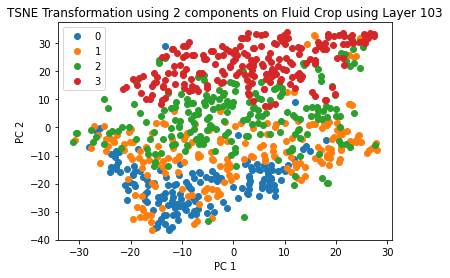

In [15]:
plot_tsne(embed_103, "Layer 103")

In [16]:
layer_203 = base_model.get_layer(index = 203).output
model_203 = tf.keras.Model(embed_in, layer_203)
embed_203 = global_layer(model_203.predict(imgs_crop))

In [17]:
classifier = tf.keras.layers.Dense(4)
layers = [model_203, global_layer, classifier]

new_203 = tf.keras.Sequential(layers)
new_203.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 4, 4, 192)         6978848   
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 4)                 772       
                                                                 
Total params: 6,979,620
Trainable params: 772
Non-trainable params: 6,978,848
_________________________________________________________________


In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
new_203.compile(optimizer='adam',     
              loss=loss_fn,         
              metrics=['accuracy']) 

new_203.fit(crop_train, clabels_train, epochs=15)

Epoch 1/15
19/19 [==============================] - 4s 42ms/step - loss: 5.4452 - accuracy: 0.3083
Epoch 2/15
19/19 [==============================] - 1s 35ms/step - loss: 5.1852 - accuracy: 0.3583
Epoch 3/15
19/19 [==============================] - 1s 35ms/step - loss: 5.1423 - accuracy: 0.3750
Epoch 4/15
19/19 [==============================] - 1s 35ms/step - loss: 5.1122 - accuracy: 0.3833
Epoch 5/15
19/19 [==============================] - 1s 35ms/step - loss: 5.4656 - accuracy: 0.3950
Epoch 6/15
19/19 [==============================] - 1s 35ms/step - loss: 5.0350 - accuracy: 0.3917
Epoch 7/15
19/19 [==============================] - 1s 35ms/step - loss: 5.0246 - accuracy: 0.4117
Epoch 8/15
19/19 [==============================] - 1s 36ms/step - loss: 4.9861 - accuracy: 0.4133
Epoch 9/15
19/19 [==============================] - 1s 36ms/step - loss: 5.0351 - accuracy: 0.3933
Epoch 10/15
19/19 [==============================] - 1s 36ms/step - loss: 4.8508 - accuracy: 0.4100
Epoch 11/

In [19]:
new_203.evaluate(crop_test, clabels_test)

5/5 [==============================] - 1s 64ms/step - loss: 1.4692 - accuracy: 0.4238


[1.4692448377609253, 0.42384105920791626]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


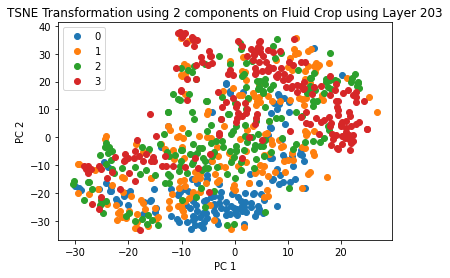

In [20]:
plot_tsne(embed_203, "Layer 203")

In [52]:
# get the last layer model embeddings to compare
layer_last = base_model.get_layer(index = -1).output
model_last = tf.keras.Model(embed_in, layer_last)
embed_last = global_layer(model_last.predict(imgs_crop))


In [53]:
classifier = tf.keras.layers.Dense(4)
layers = [model_last, global_layer, classifier]

new_last = tf.keras.Sequential(layers)
new_last.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_9 (Functional)        (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  multiple                 0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_10 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
new_last.compile(optimizer='adam',     
              loss=loss_fn,         
              metrics=['accuracy']) 

new_last.fit(crop_train, clabels_train, epochs=15)

Epoch 1/15
19/19 [==============================] - 7s 89ms/step - loss: 2.0719 - accuracy: 0.2383
Epoch 2/15
19/19 [==============================] - 1s 59ms/step - loss: 1.4032 - accuracy: 0.2417
Epoch 3/15
19/19 [==============================] - 1s 58ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 4/15
19/19 [==============================] - 1s 58ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 5/15
19/19 [==============================] - 1s 59ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 6/15
19/19 [==============================] - 1s 59ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 7/15
19/19 [==============================] - 1s 58ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 8/15
19/19 [==============================] - 1s 58ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 9/15
19/19 [==============================] - 1s 58ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 10/15
19/19 [==============================] - 1s 57ms/step - loss: 1.3863 - accuracy: 0.2517
Epoch 11/

In [56]:
new_last.evaluate(crop_test, clabels_test)

5/5 [==============================] - 4s 201ms/step - loss: 1.3863 - accuracy: 0.1987


[1.3862943649291992, 0.1986754983663559]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


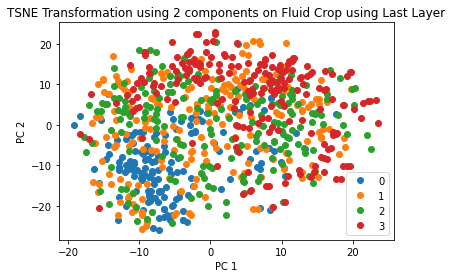

In [57]:
plot_tsne(embed_last, "Last Layer")

It looks like the embedding that created the best classifier was actually the layer 103 then layer 203 and the last layer last. I would have assumed it would have been the other way around. However, when you look at the embeddings, it does look like layer 103 gets the best seperation.